## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.8505 - accuracy: 0.3386 - val_loss: 1.7718 - val_accuracy: 0.3678
Epoch 2/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.6445 - accuracy: 0.4167 - val_loss: 1.7130 - val_accuracy: 0.3886
Epoch 3/500
50000/50000 [==============================] - 5s 105us/step - loss: 1.5542 - accuracy: 0.4497 - val_loss: 1.6196 - val_accuracy: 0.4162
Epoch 4/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.4941 - accuracy: 0.4715 - val_loss: 1.7945 - val_accuracy: 0.3895
Epoch 5/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.4452 - accuracy: 0.4892 - val_loss: 1.5627 - val_accuracy: 0.4494
Epoch 6/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.4025 - accuracy: 0.5014 - val_loss: 1.4762 - val_accuracy: 0.4693
Epoch 7/500
50000/50000 [==============================

Epoch 54/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.3742 - accuracy: 0.8668 - val_loss: 2.3666 - val_accuracy: 0.4939
Epoch 55/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.3625 - accuracy: 0.8710 - val_loss: 2.0827 - val_accuracy: 0.5245
Epoch 56/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.3324 - accuracy: 0.8832 - val_loss: 2.1426 - val_accuracy: 0.5234
Epoch 57/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.3269 - accuracy: 0.8844 - val_loss: 2.1016 - val_accuracy: 0.5313
Epoch 58/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.3140 - accuracy: 0.8909 - val_loss: 2.2181 - val_accuracy: 0.5322
Epoch 59/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.3112 - accuracy: 0.8894 - val_loss: 2.2288 - val_accuracy: 0.5320
Epoch 60/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.3086 - accuracy:

50000/50000 [==============================] - 6s 117us/step - loss: 0.0956 - accuracy: 0.9671 - val_loss: 3.6119 - val_accuracy: 0.5308
Epoch 109/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1148 - accuracy: 0.9592 - val_loss: 3.7536 - val_accuracy: 0.5234
Epoch 110/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.1263 - accuracy: 0.9561 - val_loss: 3.6159 - val_accuracy: 0.5336
Epoch 111/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0888 - accuracy: 0.9684 - val_loss: 3.9555 - val_accuracy: 0.5171
Epoch 112/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0946 - accuracy: 0.9666 - val_loss: 3.7490 - val_accuracy: 0.5386
Epoch 113/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0804 - accuracy: 0.9716 - val_loss: 3.9877 - val_accuracy: 0.5241
Epoch 114/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0814 - accuracy: 0.9709

50000/50000 [==============================] - 6s 117us/step - loss: 0.0114 - accuracy: 0.9971 - val_loss: 4.6258 - val_accuracy: 0.5450
Epoch 163/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 4.6675 - val_accuracy: 0.5482
Epoch 164/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 4.6882 - val_accuracy: 0.5490
Epoch 165/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 4.6776 - val_accuracy: 0.5476
Epoch 166/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 4.7435 - val_accuracy: 0.5526
Epoch 167/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 4.7824 - val_accuracy: 0.5494
Epoch 168/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0019 - accuracy: 0.9997

50000/50000 [==============================] - 6s 118us/step - loss: 2.1943e-04 - accuracy: 1.0000 - val_loss: 5.1190 - val_accuracy: 0.5556
Epoch 216/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.1538e-04 - accuracy: 1.0000 - val_loss: 5.1272 - val_accuracy: 0.5561
Epoch 217/500
50000/50000 [==============================] - 6s 117us/step - loss: 2.1348e-04 - accuracy: 1.0000 - val_loss: 5.1318 - val_accuracy: 0.5562
Epoch 218/500
50000/50000 [==============================] - 6s 114us/step - loss: 2.1182e-04 - accuracy: 1.0000 - val_loss: 5.1353 - val_accuracy: 0.5557
Epoch 219/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.1082e-04 - accuracy: 1.0000 - val_loss: 5.1352 - val_accuracy: 0.5549
Epoch 220/500
50000/50000 [==============================] - 6s 116us/step - loss: 2.0792e-04 - accuracy: 1.0000 - val_loss: 5.1370 - val_accuracy: 0.5556
Epoch 221/500
50000/50000 [==============================] - 6s 114us/step - loss: 2

Epoch 268/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3986e-04 - accuracy: 1.0000 - val_loss: 5.2608 - val_accuracy: 0.5558
Epoch 269/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.4016e-04 - accuracy: 1.0000 - val_loss: 5.2595 - val_accuracy: 0.5559
Epoch 270/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.3812e-04 - accuracy: 1.0000 - val_loss: 5.2628 - val_accuracy: 0.5555
Epoch 271/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.3849e-04 - accuracy: 1.0000 - val_loss: 5.2641 - val_accuracy: 0.5553
Epoch 272/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.3687e-04 - accuracy: 1.0000 - val_loss: 5.2664 - val_accuracy: 0.5565
Epoch 273/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.3681e-04 - accuracy: 1.0000 - val_loss: 5.2686 - val_accuracy: 0.5556
Epoch 274/500
50000/50000 [==============================] - 6s 119us/

Epoch 321/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.0551e-04 - accuracy: 1.0000 - val_loss: 5.3492 - val_accuracy: 0.5551
Epoch 322/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0637e-04 - accuracy: 1.0000 - val_loss: 5.3505 - val_accuracy: 0.5552
Epoch 323/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0473e-04 - accuracy: 1.0000 - val_loss: 5.3540 - val_accuracy: 0.5553
Epoch 324/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.0445e-04 - accuracy: 1.0000 - val_loss: 5.3545 - val_accuracy: 0.5554
Epoch 325/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.0406e-04 - accuracy: 1.0000 - val_loss: 5.3557 - val_accuracy: 0.5560
Epoch 326/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0367e-04 - accuracy: 1.0000 - val_loss: 5.3577 - val_accuracy: 0.5555
Epoch 327/500
50000/50000 [==============================] - 6s 124us/

Epoch 374/500
50000/50000 [==============================] - 6s 117us/step - loss: 8.6129e-05 - accuracy: 1.0000 - val_loss: 5.4205 - val_accuracy: 0.5556
Epoch 375/500
50000/50000 [==============================] - 6s 119us/step - loss: 8.5768e-05 - accuracy: 1.0000 - val_loss: 5.4194 - val_accuracy: 0.5560
Epoch 376/500
50000/50000 [==============================] - 6s 120us/step - loss: 8.5432e-05 - accuracy: 1.0000 - val_loss: 5.4225 - val_accuracy: 0.5556
Epoch 377/500
50000/50000 [==============================] - 6s 124us/step - loss: 8.5179e-05 - accuracy: 1.0000 - val_loss: 5.4225 - val_accuracy: 0.5559
Epoch 378/500
50000/50000 [==============================] - 6s 119us/step - loss: 8.4634e-05 - accuracy: 1.0000 - val_loss: 5.4224 - val_accuracy: 0.5558
Epoch 379/500
50000/50000 [==============================] - 6s 118us/step - loss: 8.4596e-05 - accuracy: 1.0000 - val_loss: 5.4277 - val_accuracy: 0.5552
Epoch 380/500
50000/50000 [==============================] - 6s 122us/

Epoch 427/500
50000/50000 [==============================] - 6s 129us/step - loss: 7.2742e-05 - accuracy: 1.0000 - val_loss: 5.4776 - val_accuracy: 0.5548
Epoch 428/500
50000/50000 [==============================] - 6s 125us/step - loss: 7.2432e-05 - accuracy: 1.0000 - val_loss: 5.4765 - val_accuracy: 0.5549
Epoch 429/500
50000/50000 [==============================] - 8s 152us/step - loss: 7.2139e-05 - accuracy: 1.0000 - val_loss: 5.4797 - val_accuracy: 0.5552
Epoch 430/500
50000/50000 [==============================] - 6s 123us/step - loss: 7.2079e-05 - accuracy: 1.0000 - val_loss: 5.4803 - val_accuracy: 0.5553
Epoch 431/500
50000/50000 [==============================] - 6s 121us/step - loss: 7.1893e-05 - accuracy: 1.0000 - val_loss: 5.4800 - val_accuracy: 0.5550
Epoch 432/500
50000/50000 [==============================] - 6s 117us/step - loss: 7.1602e-05 - accuracy: 1.0000 - val_loss: 5.4818 - val_accuracy: 0.5548
Epoch 433/500
50000/50000 [==============================] - 6s 118us/

Epoch 480/500
50000/50000 [==============================] - 6s 119us/step - loss: 6.3403e-05 - accuracy: 1.0000 - val_loss: 5.5235 - val_accuracy: 0.5554
Epoch 481/500
50000/50000 [==============================] - 6s 117us/step - loss: 6.3010e-05 - accuracy: 1.0000 - val_loss: 5.5255 - val_accuracy: 0.5552
Epoch 482/500
50000/50000 [==============================] - 6s 116us/step - loss: 6.2933e-05 - accuracy: 1.0000 - val_loss: 5.5248 - val_accuracy: 0.5547
Epoch 483/500
50000/50000 [==============================] - 6s 119us/step - loss: 6.2675e-05 - accuracy: 1.0000 - val_loss: 5.5267 - val_accuracy: 0.5546
Epoch 484/500
50000/50000 [==============================] - 6s 117us/step - loss: 6.2601e-05 - accuracy: 1.0000 - val_loss: 5.5290 - val_accuracy: 0.5551
Epoch 485/500
50000/50000 [==============================] - 6s 118us/step - loss: 6.2432e-05 - accuracy: 1.0000 - val_loss: 5.5276 - val_accuracy: 0.5547
Epoch 486/500
50000/50000 [==============================] - 6s 116us/

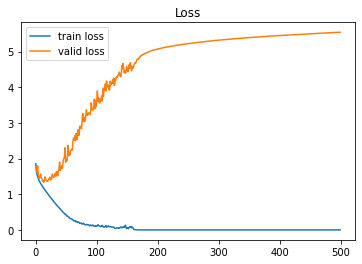

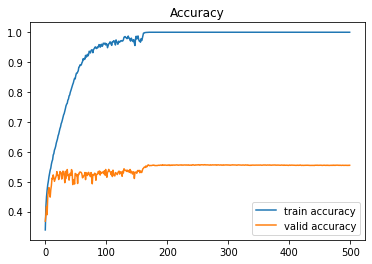

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [9]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model500.h5'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\RT009223\Github\ML100Days\ML100Days\homework\saved_models\keras_cifar10_trained_model500.h5 
10000/10000 [==============================] - 1s 69us/step
Test loss: 5.541608033752442
Test accuracy: 0.5548999905586243
